# For each noise:
- Estimate the spectrum density by periodogram and Welsh method
- Identify the color of the noise (white, pink, red…)

## Preparation: load the wave file

In [1]:
import numpy as np
import numpy.fft as nf
import scipy.signal as signal
import matplotlib.pyplot as plt
import wave
import cv2
import simpleaudio as sa
import time
import IPython

In [2]:
## function wave_read: read the wave file and the corresponding parameters

def wave_read(file_name):
    file = wave.open(file_name)
    params = file.getparams() # read the parameters
    nchannels, sampwidth, framerate, nframes = params[:4]
    
    # Reads the complete frame data into str_data, which is a string type
    str_data = file.readframes(nframes)
    # Convert the audio waveform data to an array
    wave_data =  np.frombuffer(str_data, dtype = np.short)
    
    # time is an array paired with wave_data
    time = np.arange(0,nframes) * (1.0/ framerate)
    
    return nchannels, sampwidth, framerate, nframes, wave_data, time

In [3]:
# read three noises file
nchannels_1, sampwidth_1, framerate_1, nframes_1, noise_data_1, time_1 = wave_read("noise1.wav")
nchannels_2, sampwidth_2, framerate_2, nframes_2, noise_data_2, time_2 = wave_read("noise2.wav")
nchannels_3, sampwidth_3, framerate_3, nframes_3, noise_data_3, time_3 = wave_read("noise3.wav")

## Spectrum density by periodogram

In [4]:
# use the scipy.signal.periodogram
f_per1, Pxx_per1 = signal.periodogram(noise_data_1, framerate_1, 'flattop', scaling='spectrum')
f_per2, Pxx_per2 = signal.periodogram(noise_data_2, framerate_2, 'flattop', scaling='spectrum')
f_per3, Pxx_per3 = signal.periodogram(noise_data_3, framerate_3, 'flattop', scaling='spectrum')


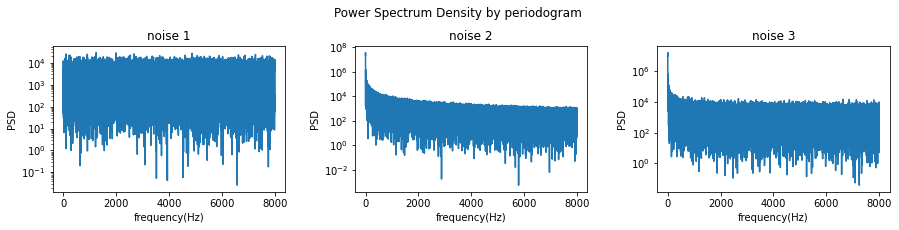

In [5]:
# plot the spectrum density of all the three noises
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (15,3))

ax1.semilogy(f_per1, Pxx_per1)
ax1.set_title("noise 1")
ax1.set_xlabel('frequency(Hz)')
ax1.set_ylabel('PSD')

ax2.semilogy(f_per2, Pxx_per2)
ax2.set_title("noise 2")
ax2.set_xlabel("frequency(Hz)")
ax2.set_ylabel('PSD')

ax3.semilogy(f_per3, Pxx_per3)
ax3.set_title("noise 3")
ax3.set_xlabel("frequency(Hz)")
ax3.set_ylabel('PSD')

plt.suptitle('Power Spectrum Density by periodogram')

plt.subplots_adjust(left=0.125,
                    bottom=0.125, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.3, 
                    hspace=0.1)

plt.show()


From the above graphs we can see that the periodogram is strongly influenced by the period of observation. The power spectrum density obtained by the periodogram method is not that smooth, and the undulation of the flutter line increases when the data length N is large, while the resolution of the spectrum is not good when N is small. Therefore, the periodogram cannot be smoothed by increasing the number of sampling points, which is a drawback of the periodogram method.

## Spectrum density by Welsh method

In [6]:
# use the scipy.signal.welch
f_wel1, Pxx_wel1 = signal.welch(noise_data_1, framerate_1, 'flattop', scaling='spectrum')
f_wel2, Pxx_wel2 = signal.welch(noise_data_2, framerate_2, 'flattop', scaling='spectrum')
f_wel3, Pxx_wel3 = signal.welch(noise_data_3, framerate_3, 'flattop', scaling='spectrum')

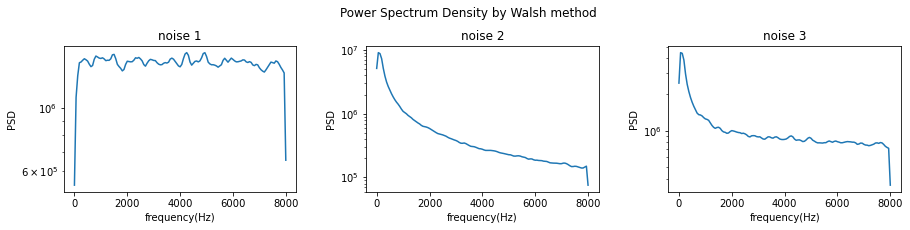

In [7]:
# plot the spectrum density of all the three noises
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (15,3))

ax1.semilogy(f_wel1, Pxx_wel1)
ax1.set_title("noise 1")
ax1.set_xlabel('frequency(Hz)')
ax1.set_ylabel('PSD')

ax2.semilogy(f_wel2, Pxx_wel2)
ax2.set_title("noise 2")
ax2.set_xlabel("frequency(Hz)")
ax2.set_ylabel('PSD')

ax3.semilogy(f_wel3, Pxx_wel3)
ax3.set_title("noise 3")
ax3.set_xlabel("frequency(Hz)")
ax3.set_ylabel('PSD')

plt.suptitle('Power Spectrum Density by Walsh method')

plt.subplots_adjust(left=0.125,
                    bottom=0.125, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.3, 
                    hspace=0.1)

plt.show()

Comparing with the results obatined from periodogram, the Welch method uses a window overlay to find the power spectrum, which can effectively reduce the variance and bias, and has good convergence.

What's more, We could see from the PSD curve that the first noise is the white noise with random signal having equal intensity at different frequencies. The second one is probably a pink noise whose power spectral density is inversely proportional to the frequency of the signal. And the third one is a combination of pink noise and white noise, the pink noise dominates in the low frequency region while the white noise dominates in the high frequency region.

# With the image Barbara
- Simulate a noisy version of the image with various SNR (0dB, 5 dB, 10 dB, 15 dB, 20 dB), using a Gaussian white noise
- Denoise the image using the Wiener filter

Text(0.5, 1.0, 'Original image')

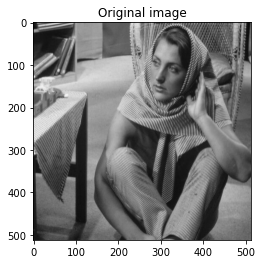

In [8]:
gray_img = cv2.imread('barbara.jpg', 0) # read the gray image

plt.imshow(gray_img, 'gray')
plt.title('Original image')

## Add a Gaussian white noise to initial image

According to the definition of SNR:
    $ SNR(y \mid x)=20 \log \left(\frac{\|x\|}{\|x-y\|}\right) $

we can calculate the power of noise:
    $P_{noise} = \frac{P_{singal}}{10^{\frac{SNR}{10}}}$
    

In [9]:
## add a Gaussian white noise to image
def add_gaussian_noise(image, SNRdb, mu, sigma):
    # calculate the power of noise from SNRdb
    Ps = np.sum(np.power(image, 2))/image.size
    Pn = Ps / (pow(10, SNRdb/10))
        
    # add the noise to initial image
    noise = np.random.normal(mu, sigma, image.shape)* np.sqrt(Pn)
    
    image = np.array(image/255, dtype = "float64")
    
    out = image + noise 
    
    if out.min() < 0:
        low_clip = -1. 
    else:
        low_clip = 0.
        
    img_out = np.clip(out, low_clip, 1.0)
    
    img_noise = np.uint8(out*255)
    
    return img_noise 

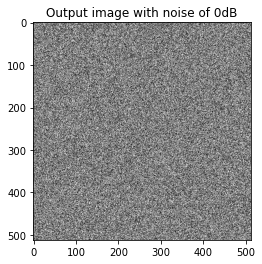

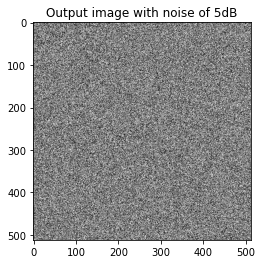

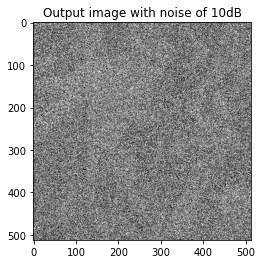

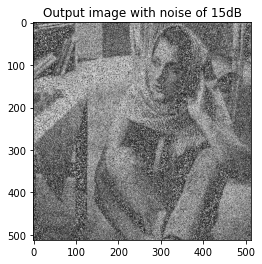

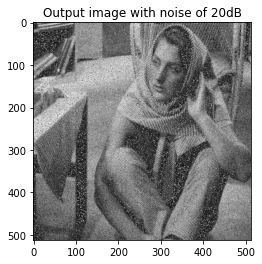

In [10]:
# add noise(0-20 dB) to the image
SNRdb_list = [0, 5, 10, 15, 20]
mu = 0
sigma = 0.1
for SNRdb in SNRdb_list:    
    img_out = add_gaussian_noise(gray_img, SNRdb, mu, sigma)
    
    plt.figure()
    plt.imshow(img_out, 'gray')
    plt.title('Output image with noise of ' + str(SNRdb) + "dB")

## Denoise the image using the Wiener filter

In [11]:
# implementation of the wiener filter
def wiener(noise_img, init_img, SNRdb, mu, sigma):
    # compute power spectrum of initial image
    P_img = 1/(init_img.shape[0]**2) *(np.abs(nf.fft2(init_img))**2)
    
    # compute power spectrum of noise np.sum(np.power(init_img, 2))/init_img.size
    Pn = (np.sum(np.power(init_img, 2))/init_img.size) / (np.power(10, SNRdb / 10))
    noise = np.random.normal(mu, sigma, init_img.shape) * np.sqrt(Pn)
    P_noise = 1 / (noise.shape[0]**2) *(np.abs(nf.fft2(noise))**2)
    
    # compute the approximate Wiener filter
    h_img = P_img / (P_img + P_noise)
    
    denoise_img = np.abs(nf.ifft2(nf.fft2(noise_img)*h_img))
    
    denoise_img = (denoise_img - np.min(denoise_img)) * 255/(np.max(denoise_img) - np.min(denoise_img))  
    
    return denoise_img
    

In [12]:
# implementation of the wiener filter
def wiener(noise_img, init_img, sigma):
    # implement the translation invariant linear denoising with a convolution
    cconv = lambda a,b : np.real(nf.ifft2(nf.fft2(a)*nf.fft2(b)))
    
    # compute power spectrum of initial image
    P_img = 1/init_img.size * (np.abs(nf.fft2(init_img))**2 )
    
    # Compute the approximate Wiener filter
    h_w = np.real(nf.ifft2(P_img / (P_img + sigma**2)))
    
    # denoise with convolution
    denoise_img = cconv(noise_img,h_w)
    # normalisation
    denoise_img = (denoise_img - np.min(denoise_img)) * 255/(np.max(denoise_img) - np.min(denoise_img))
    
    return denoise_img

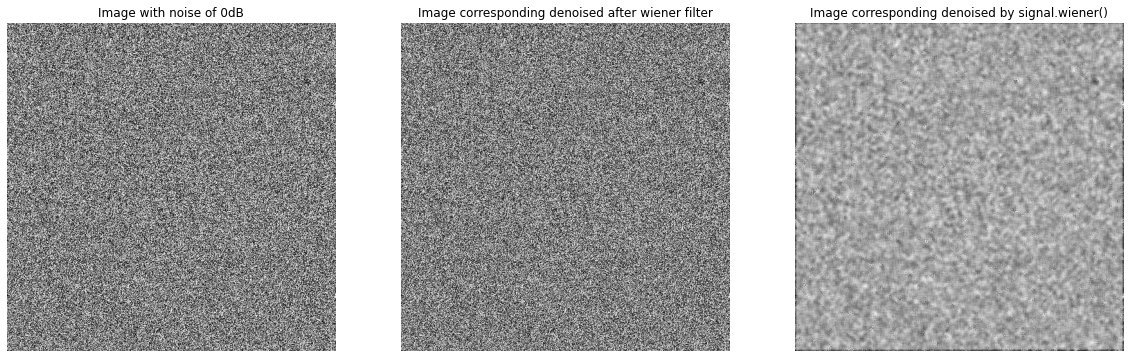

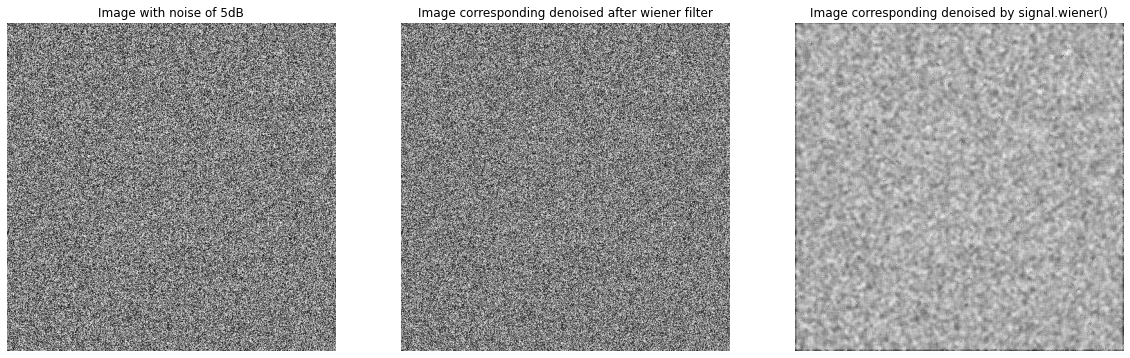

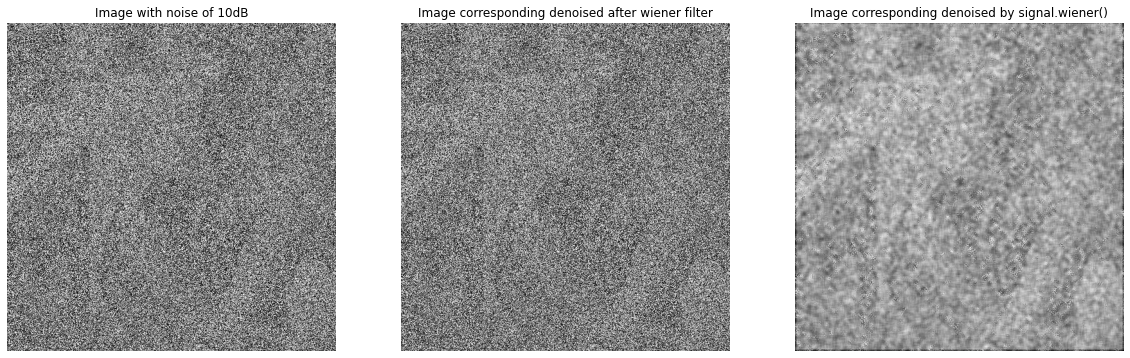

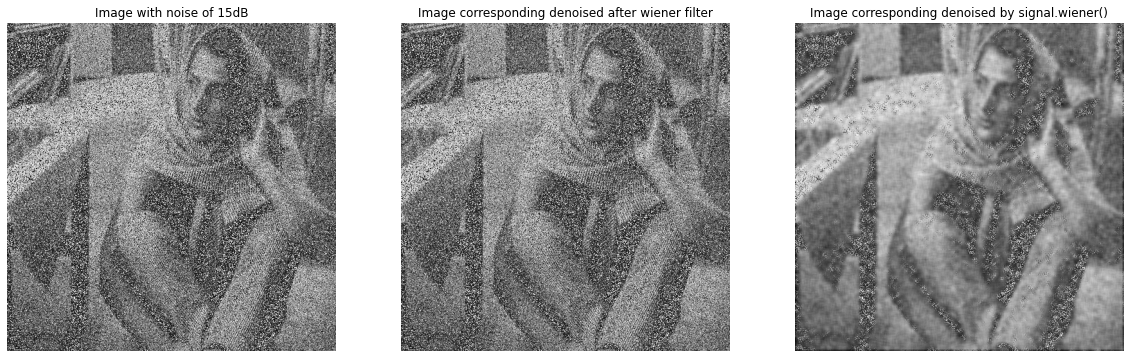

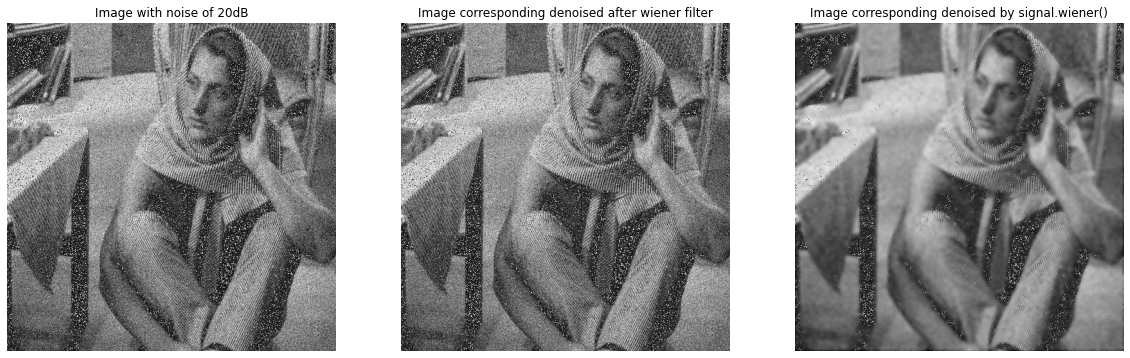

In [13]:
SNRdb_list = [0, 5, 10, 15, 20]
mu = 0
sigma = 0.1

for SNRdb in SNRdb_list:
    # add gaussain noise to the initial gray image
    img_out = add_gaussian_noise(gray_img, SNRdb, mu, sigma).astype('float64')
    
    # denoise by the wiener filter implemented by myself
    denoise_img = wiener(img_out, gray_img, sigma)
    
    # denoise directly by signal.wiener()
    denoise_img2 = signal.wiener(img_out, [7, 7])
    denoise_img2 = np.uint8(denoise_img2 / denoise_img2.max() * 255)
    
    figure, ax = plt.subplots(nrows = 1,ncols = 3, figsize = (20,15))

    ax.ravel()[0].imshow(img_out, 'gray')
    ax.ravel()[0].set_title('Image with noise of ' + str(SNRdb) + "dB")
    ax.ravel()[0].set_axis_off()

    ax.ravel()[1].imshow(denoise_img, 'gray')
    ax.ravel()[1].set_title('Image corresponding denoised after wiener filter')
    ax.ravel()[1].set_axis_off()
    
    ax.ravel()[2].imshow(denoise_img2, 'gray')
    ax.ravel()[2].set_title('Image corresponding denoised by signal.wiener()')
    ax.ravel()[2].set_axis_off()

The results were shown above: the first col is the iamges with different dB of noise added, the second col showed the denoised images by wiener filter implemented by myself, and the third col showed the denoised images by wiener filter proposed directly by signal labrary.

We could see that the wiener filter implemented by myself doesn't work well, while the wiener filter by python built-in function works better and is able to better remove the noise in the lighter region rather than the dark region. What's more, we could notice that wiener filter tend to blur the edge information of images comparing to the initial image.

# With the noised musics:
- Simulate a noisy version of the music using the three noises using a global factor of 0.1 for each noise.
- Denoise the sound using the Oracle Wiener filter.

## Stimulate a noisy version of music

In [14]:
nchannels_music, sampwidth_music, framerate_music, nframes_music, music_data, time_music\
= wave_read("music.wav")

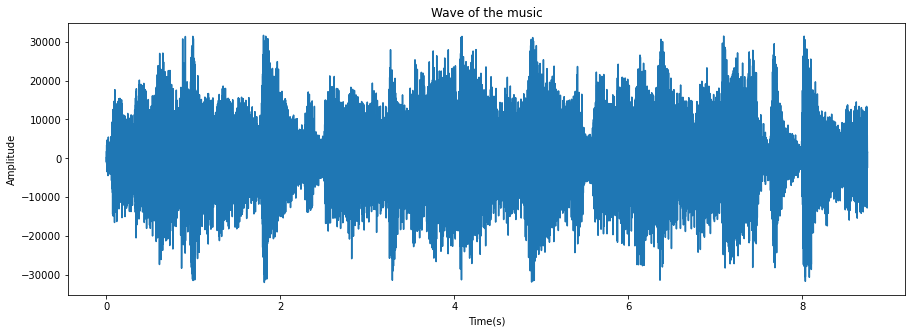

In [15]:
# plot the wave of the music
plt.figure(figsize = (15,5))
plt.plot(time_music, music_data)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude") 
plt.title("Wave of the music")
plt.show()

In [16]:
# add the noise to the audio 
def add_audio_noise(music, nframes_music, noise, nframes_noise):
    # if the length of noise if shorter than music, repeat the begin of noise
    if nframes_noise < nframes_music:
        temp = noise[0:nframes_music-nframs_noise]
        noise = np.concatenate((noise, temp))
    
    # if the length of noise if longer than music, intercept the begining part
    elif nframes_noise > nframes_music:
        noise = noise[0:nframes_music]
    
    # add the noise with global factor of 0.1
    noise_added = noise * 0.1
    music_with_noise = music + noise_added
    
    return music_with_noise, noise_added
        

In [17]:
# three noises with a global factor of 0.1 for each noise
noise = noise_data_1 + noise_data_2 + noise_data_3

# add the noise
music_with_noise, noise_added = add_audio_noise(music_data, nframes_music, noise, nframes_1)

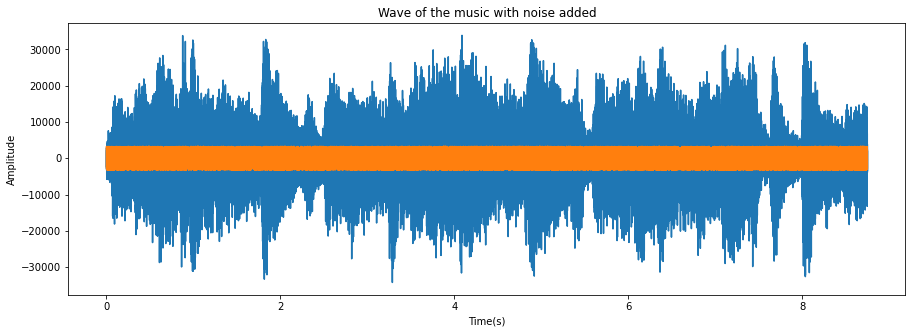

In [18]:
plt.figure(figsize = (15,5))
plt.plot(time_music, music_with_noise)
plt.plot(time_music, noise_added)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude") 
plt.title("Wave of the music with noise added")
plt.show()

In [19]:
IPython.display.Audio(music_with_noise, rate = framerate_music)

The representation of the wave of music and the noise added in time domain is shown is the figure above. And we could verify with the audio played that the noise is already added to the initial music audio.

## Denoise the sound using the Oracle Wiener filter.

In [20]:
def oracle_wiener(music_with_noise, music, sigma, nframes):
    # implement the translation invariant linear denoising with a convolution
    cconv = lambda a,b : np.real(nf.ifft(nf.fft(a)*nf.fft(b)))
    
    # compute power spectrum of initial image
    P_sound = 1/nframes * (np.abs(nf.fft(music))**2 )
    
    # Compute the approximate Wiener filter
    h_w = np.real(nf.ifft(P_sound / (P_sound + sigma**2)))
    
    # denoise with convolution
    denoise_sound = cconv(music_with_noise,h_w)
    
    return denoise_sound

In [33]:
sigma = 0.1
# denoise the music with self-implemented wiener
denoised_music = oracle_wiener(music_with_noise, music_data, sigma, nframes_music)

# denoise the music with python "signal.wiener"
denoised_music1 = signal.wiener(music_with_noise)

In [34]:
IPython.display.Audio(denoised_music, rate = framerate_music)

In [35]:
IPython.display.Audio(denoised_music1, rate = framerate_music)

Comparing to the two denoised sounds above, we can also remark that our self-implemented wiener doesn't work very well for music denoising, because we could still hear the noise very clearly. While using the signal.wiener() works much better and the noise is much reduced.